# Mount Drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive%
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [3]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_Omniglot, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_omniglot_dataloaders_classification
from utils.training import run, evaluate

# Dataset:

In [5]:
batch_size_train = 1000
batch_size_test = 64
# Dataset
train_loader, valid_loader, test_loader = get_omniglot_dataloaders_classification(batch_size_train, batch_size_test)

Files already downloaded and verified
Number of training examples: 16
Number of testing examples: 31


# Training:

## Training parameters:

In [0]:
# parameters default values
epochs = 50
lr = 1e-3
momentum = 0.9
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary Network:

In [7]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_Omniglot(binary)
print(name_model)

Omniglot_classif_NonBinaryNet


In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/No_binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [8]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded Omniglot_classif_NonBinaryNet


In [12]:
evaluate(model_no_binary, test_loader)

Test Results - Avg accuracy: 94.97 Avg loss: 0.22


In [13]:
evaluate(model_no_binary, valid_loader)

Test Results - Avg accuracy: 92.74 Avg loss: 0.30


In [14]:
evaluate(model_no_binary, train_loader)

Test Results - Avg accuracy: 93.30 Avg loss: 0.27


## Run Binary Network:

In [0]:
# parameters model to load no Binary model
binary = True
model, name_model = get_my_model_Omniglot(binary)
print(name_model)

In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/Binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

In [15]:
evaluate(model_binary, test_loader)

Test Results - Avg accuracy: 93.05 Avg loss: 0.27


In [16]:
evaluate(model_binary, valid_loader)

Test Results - Avg accuracy: 93.26 Avg loss: 0.29


In [17]:
evaluate(model_binary, train_loader)

Test Results - Avg accuracy: 93.38 Avg loss: 0.28


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2, get_filter_layer3, get_filter_layer4
from visualize.viz import get_region_layer1, get_region_layer2, get_region_layer3, get_region_layer4, get_regions_interest

# for regions extraction
import collections
from functools import partial
import cv2

## Load models:

In [10]:
# parameters model to load no Binary model
binary = False
model_no_binary, name_model_no_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_no_binary)

Model Loaded Omniglot_classif_NonBinaryNet


In [11]:
# parameters model to load no Binary model
binary = True
model_binary, name_model_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_binary)

Model Loaded Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
print(model_no_binary)

NoBinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (layer3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer3): ReLU()
  (layer4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer4): ReLU()
  (layer5): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [0]:
print(model_binary)

BinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (layer3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer3): ReLU()
  (layer4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer4): ReLU()
  (layer5): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padd

## Visualization few predictions:

No binary model


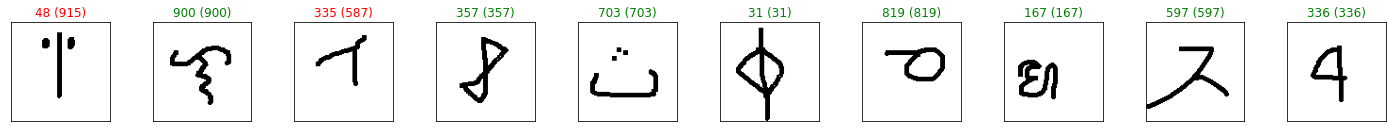

Binary model


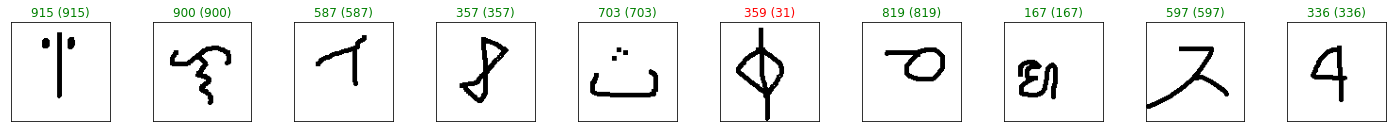

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 859


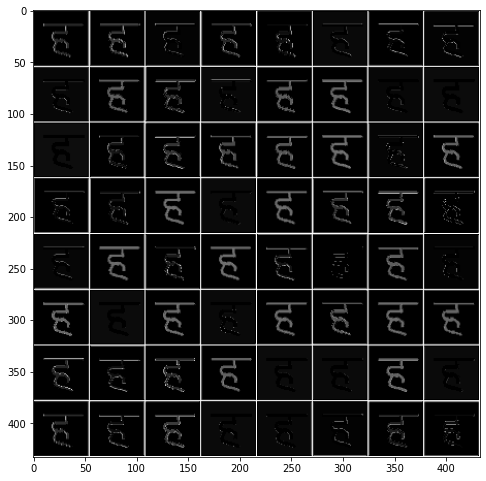

act_layer2 for label 859


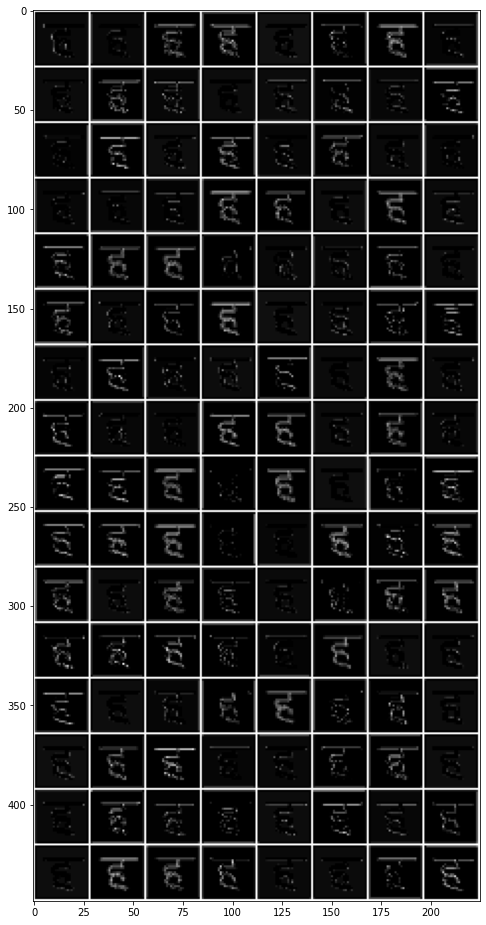

act_layer3 for label 859


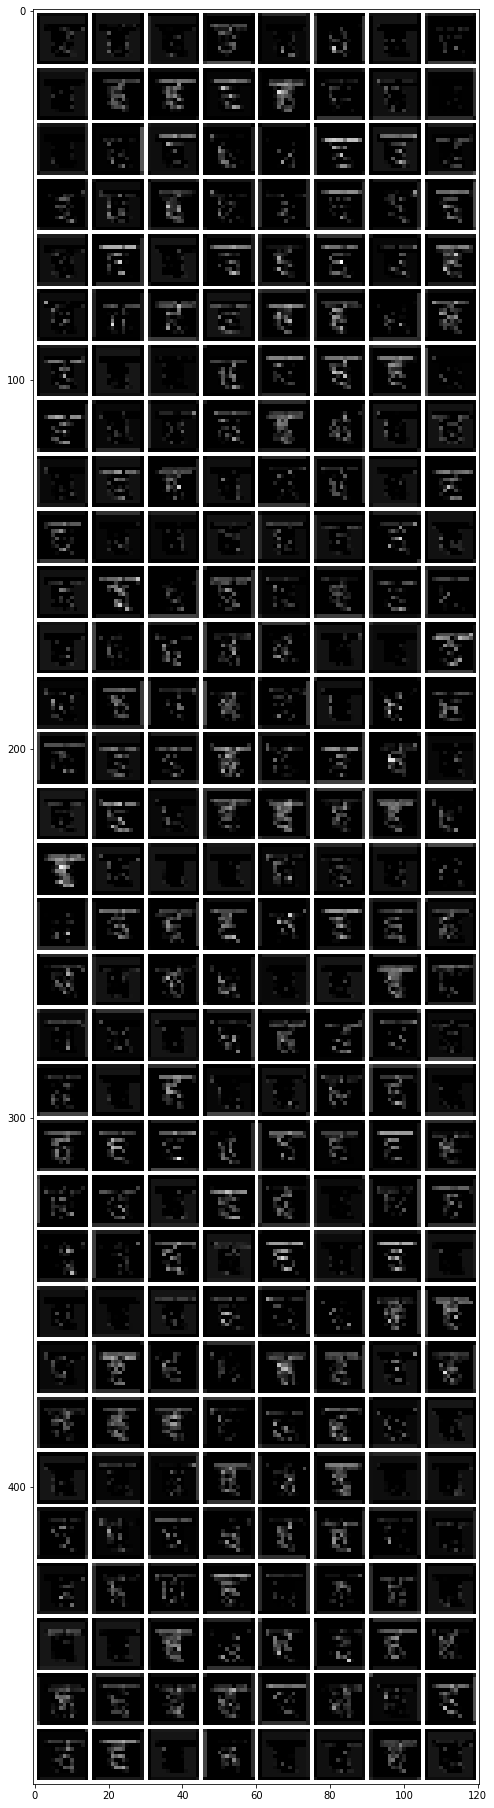

act_layer4 for label 859


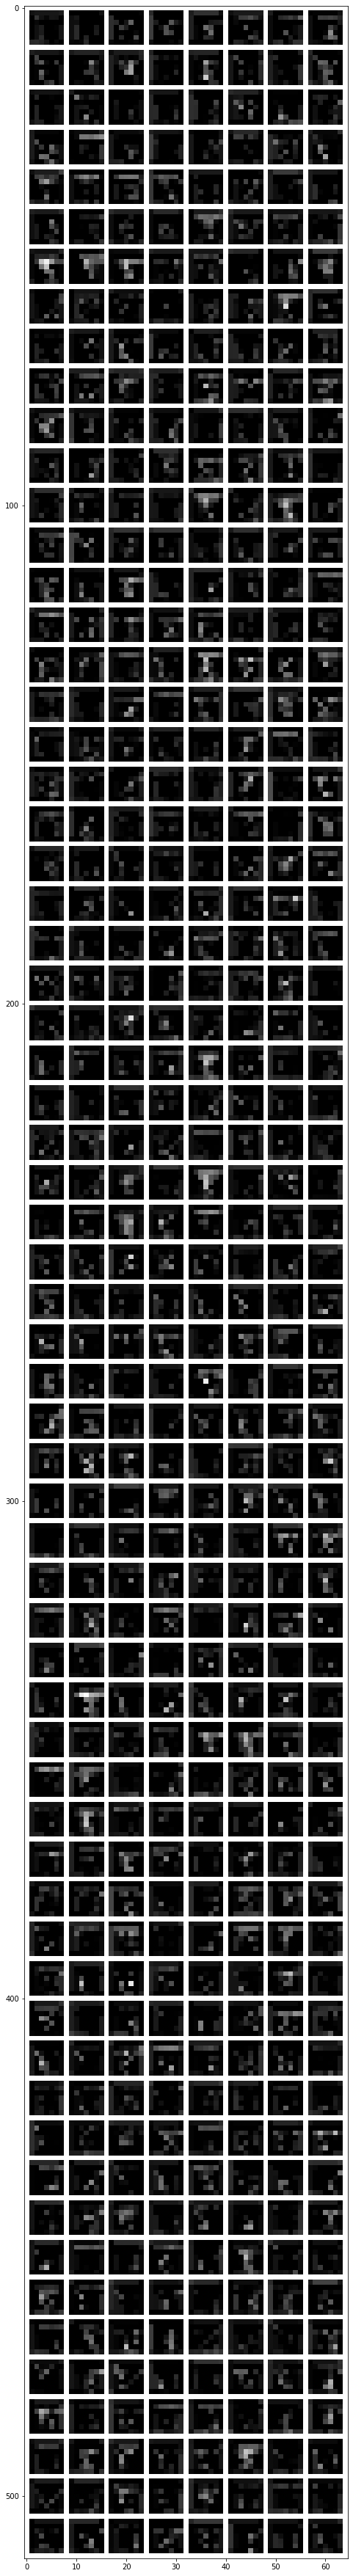

act_layer5 for label 859


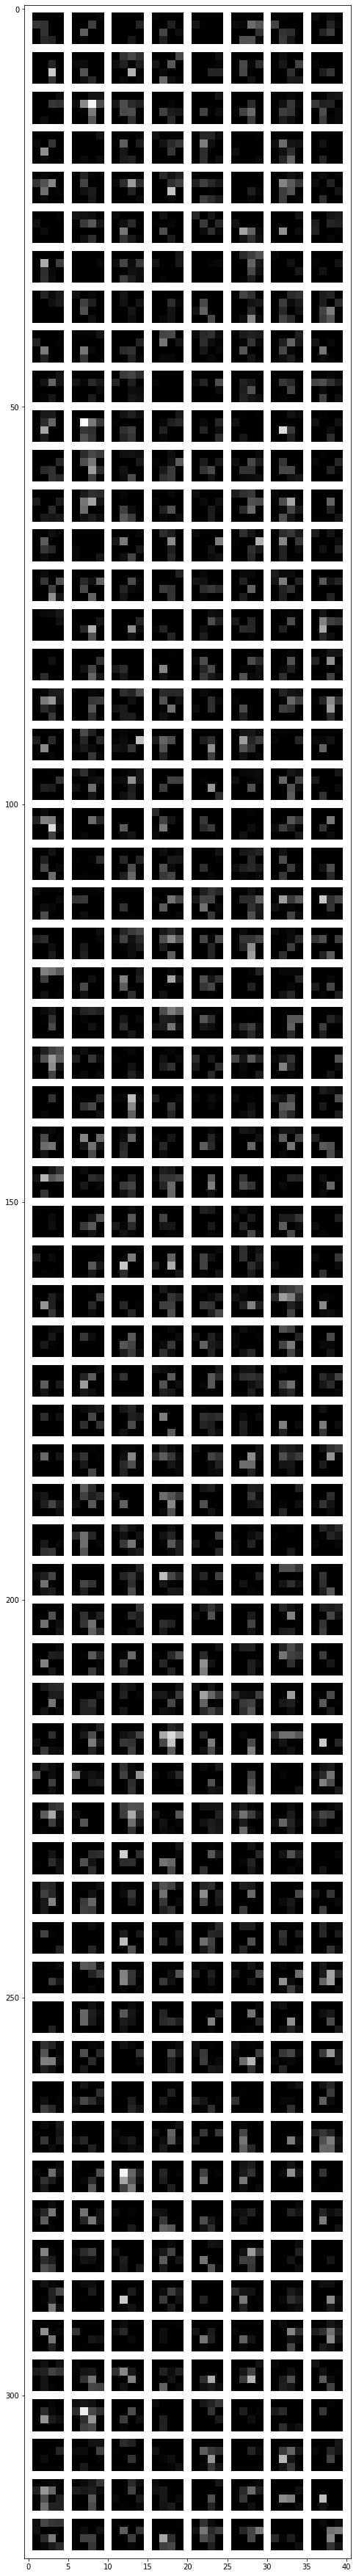

act_fc1 for label 859


IndexError: ignored

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 135


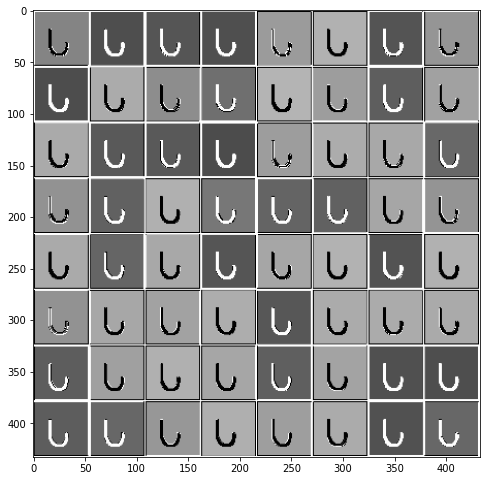

act_layer2 for label 135


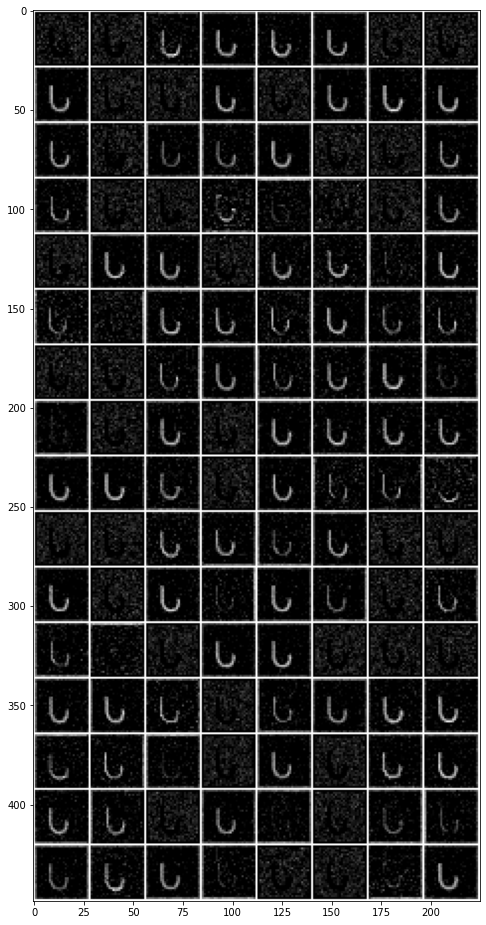

act_layer3 for label 135


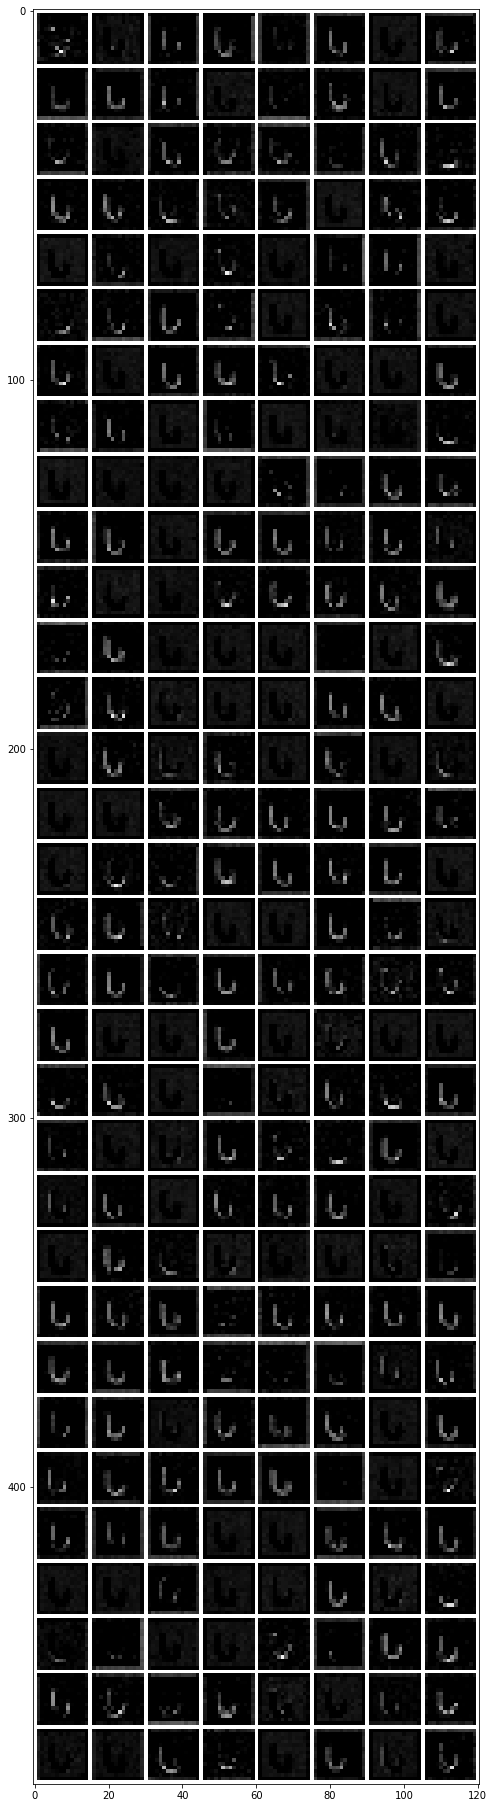

act_layer4 for label 135


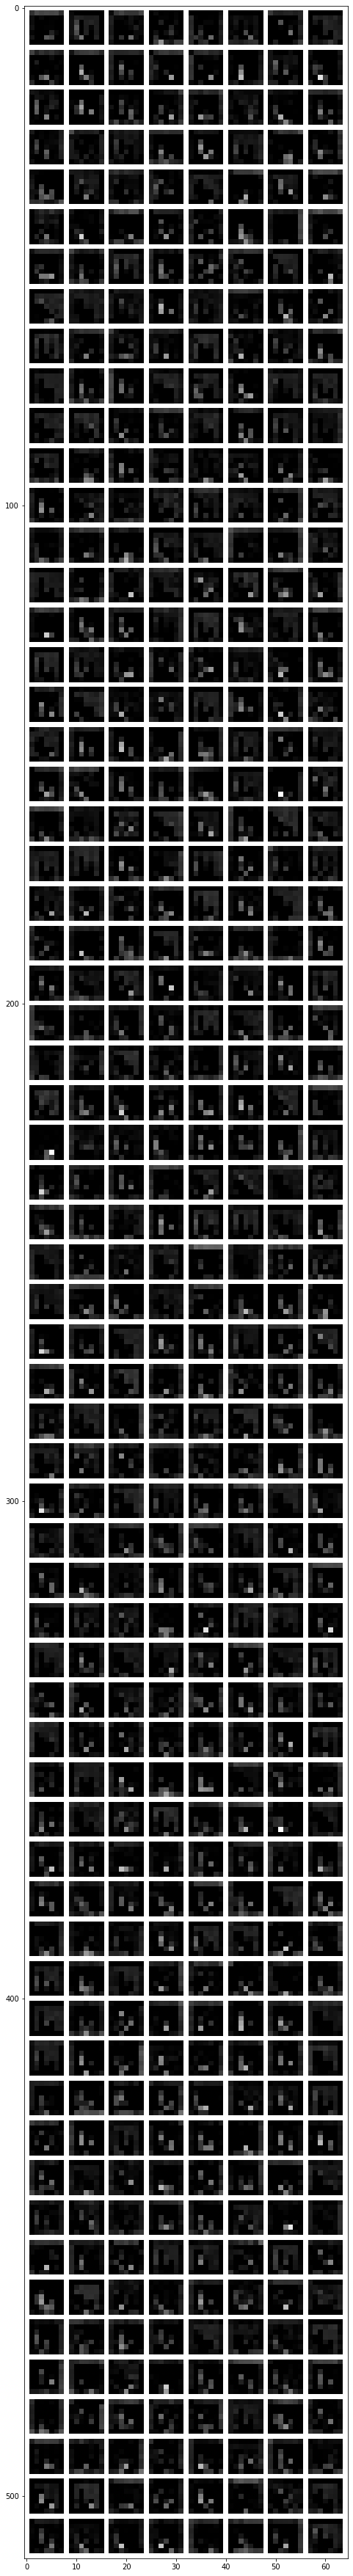

act_layer5 for label 135


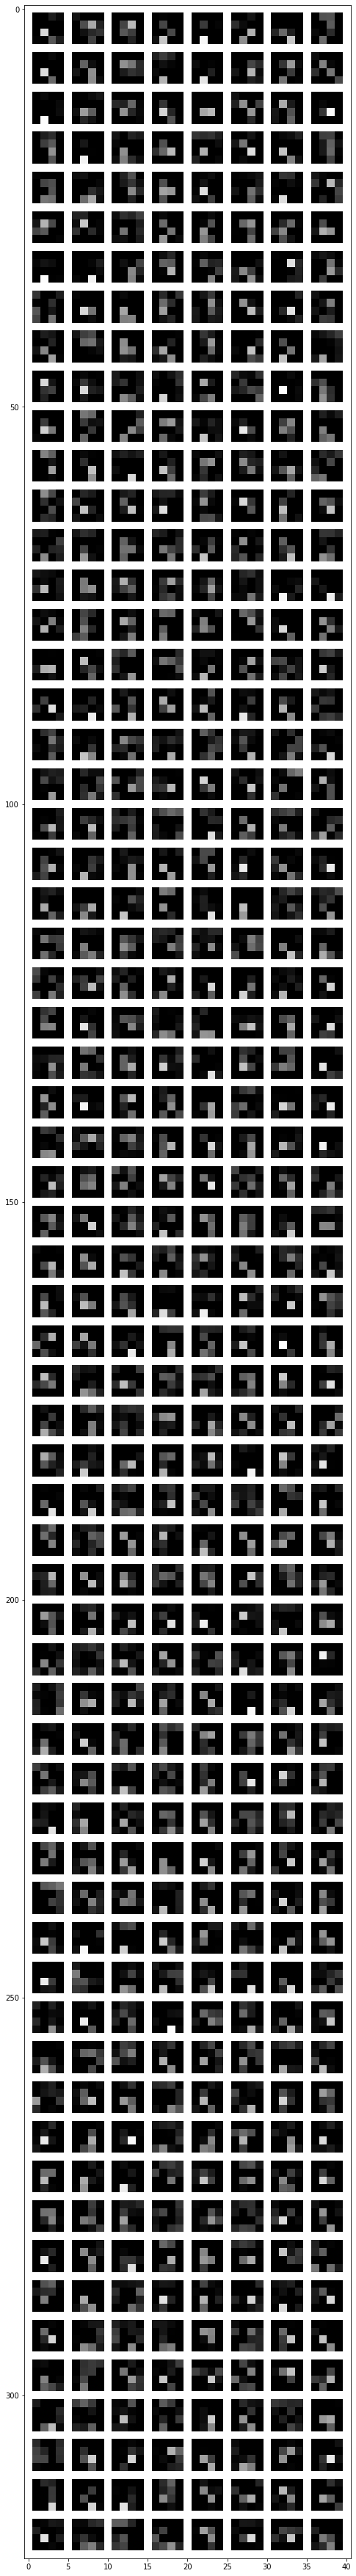

act_fc1 for label 135


IndexError: ignored

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:

layer:act_layer1 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


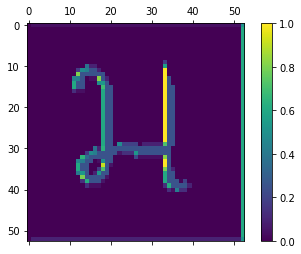

layer:act_layer2 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


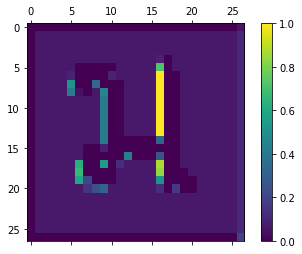

layer:act_layer3 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


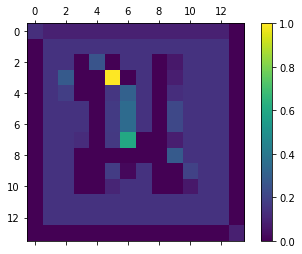

layer:act_layer4 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


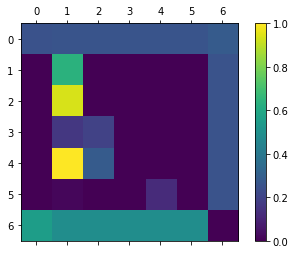

layer:act_layer5 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


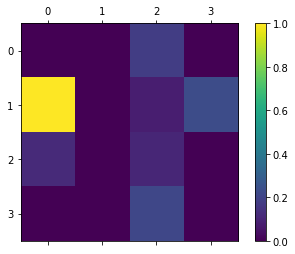

layer:act_fc1 :heatrmap for an image of label 486 with model Omniglot_classif_NonBinaryNet


TypeError: ignored

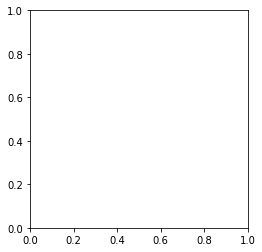

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model_no_binary, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


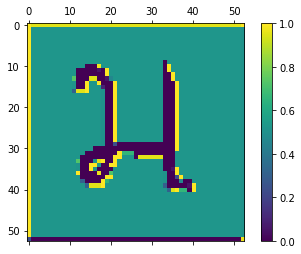

layer:act_layer2 :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


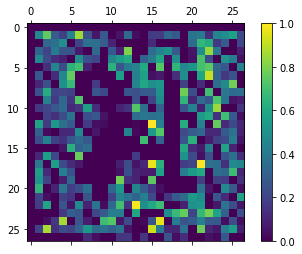

layer:act_layer3 :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


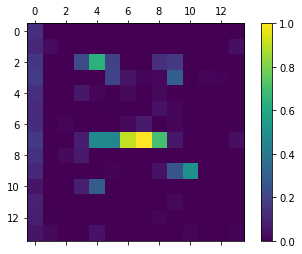

layer:act_layer4 :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


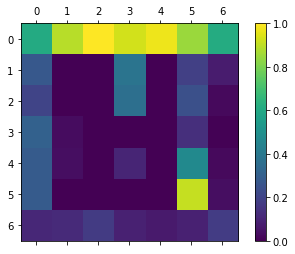

layer:act_layer5 :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


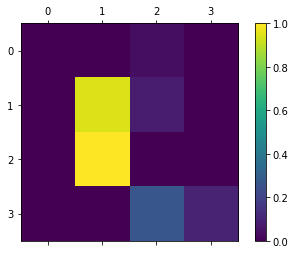

layer:act_fc1 :heatrmap for an image of label 486 with model Omniglot_classif_Stochastic_ST_first_conv_binary


TypeError: ignored

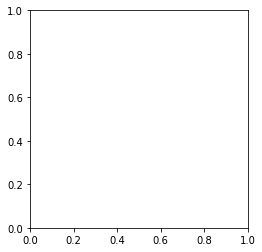

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model_binary, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


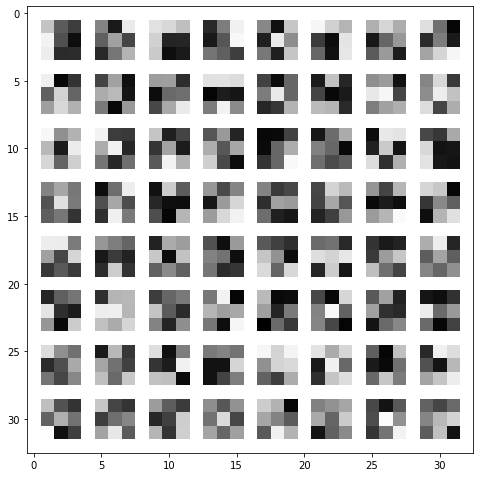

Visualization filters learned for layer: layer2


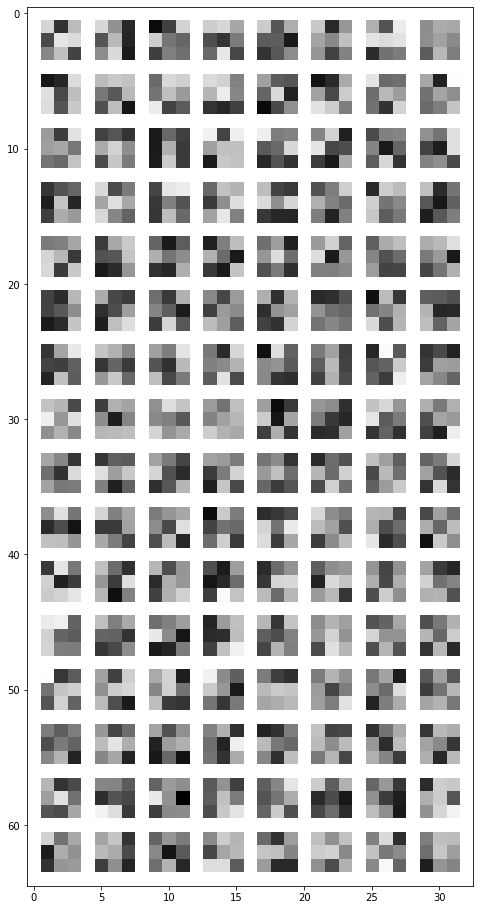

Visualization filters learned for layer: layer3


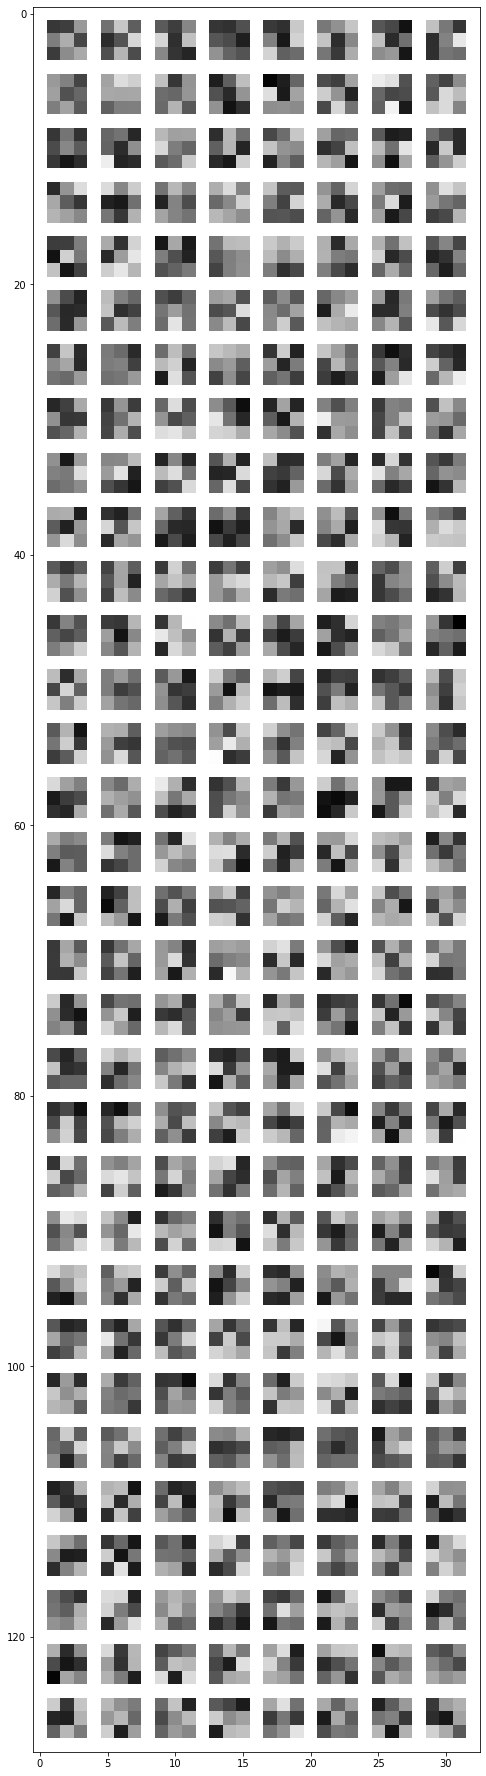

Visualization filters learned for layer: layer4


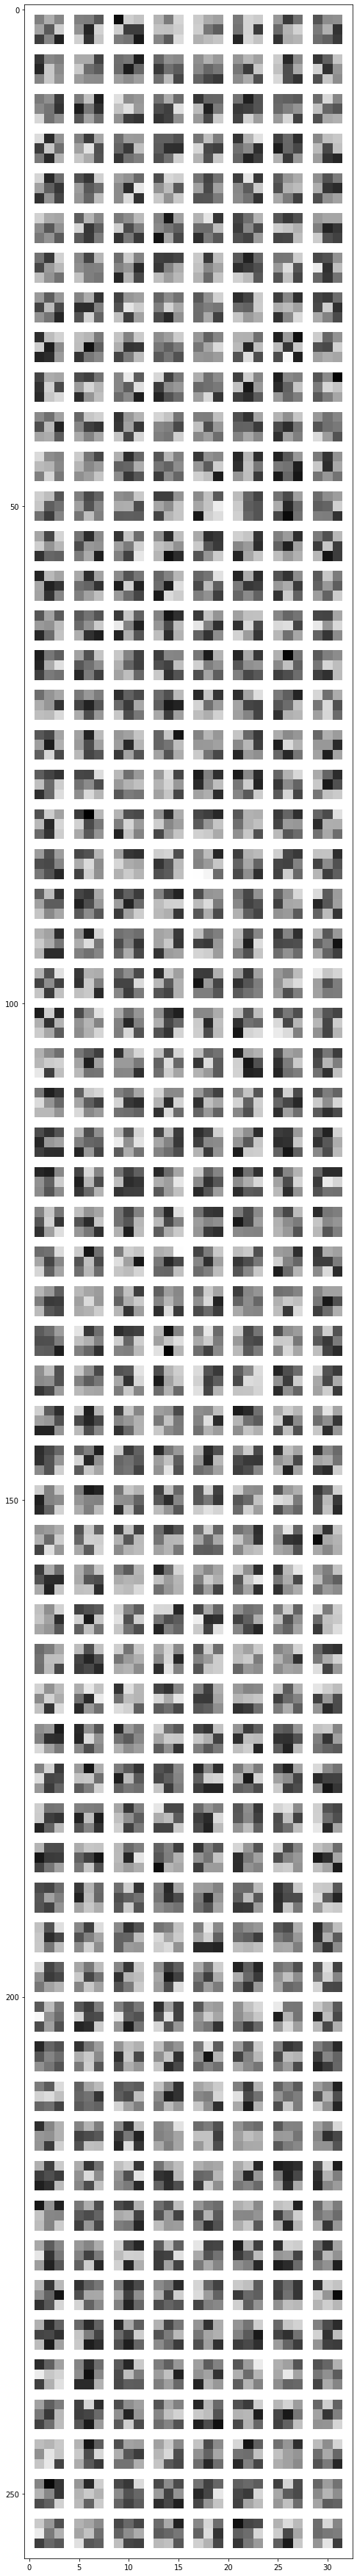

Visualization filters learned for layer: layer5


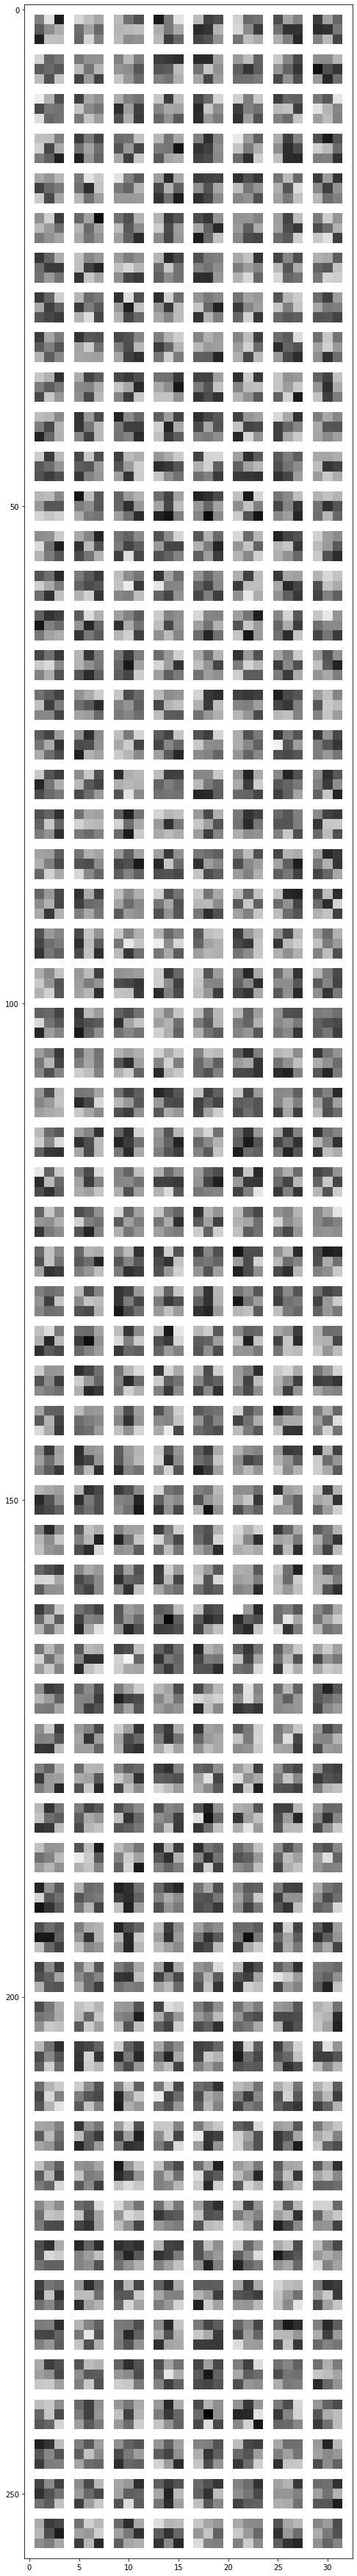

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


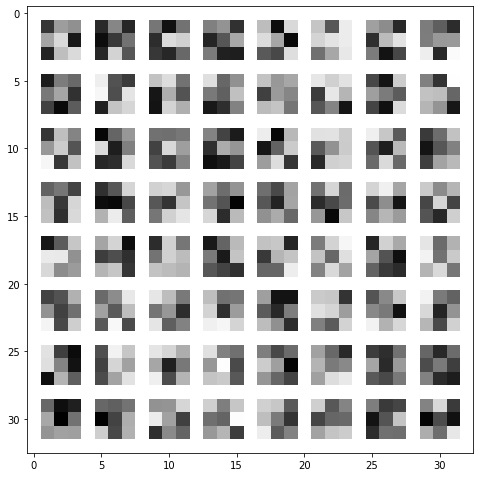

Visualization filters learned for layer: layer2


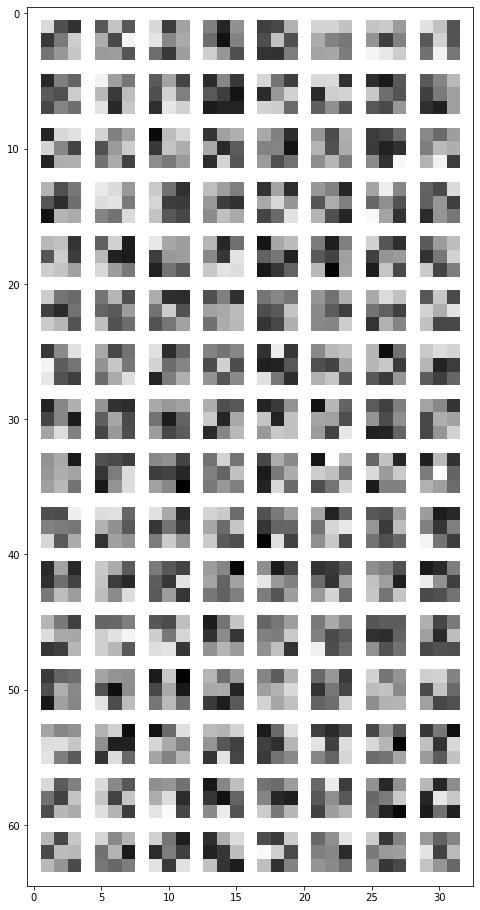

Visualization filters learned for layer: layer3


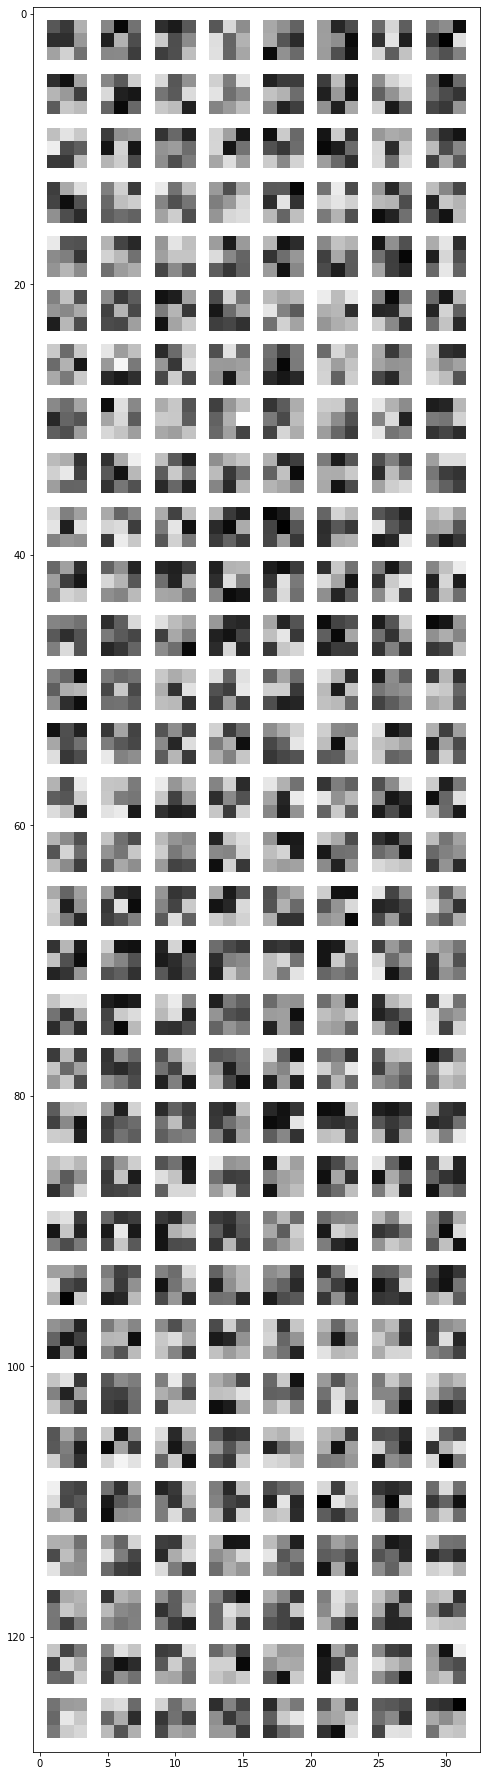

Visualization filters learned for layer: layer4


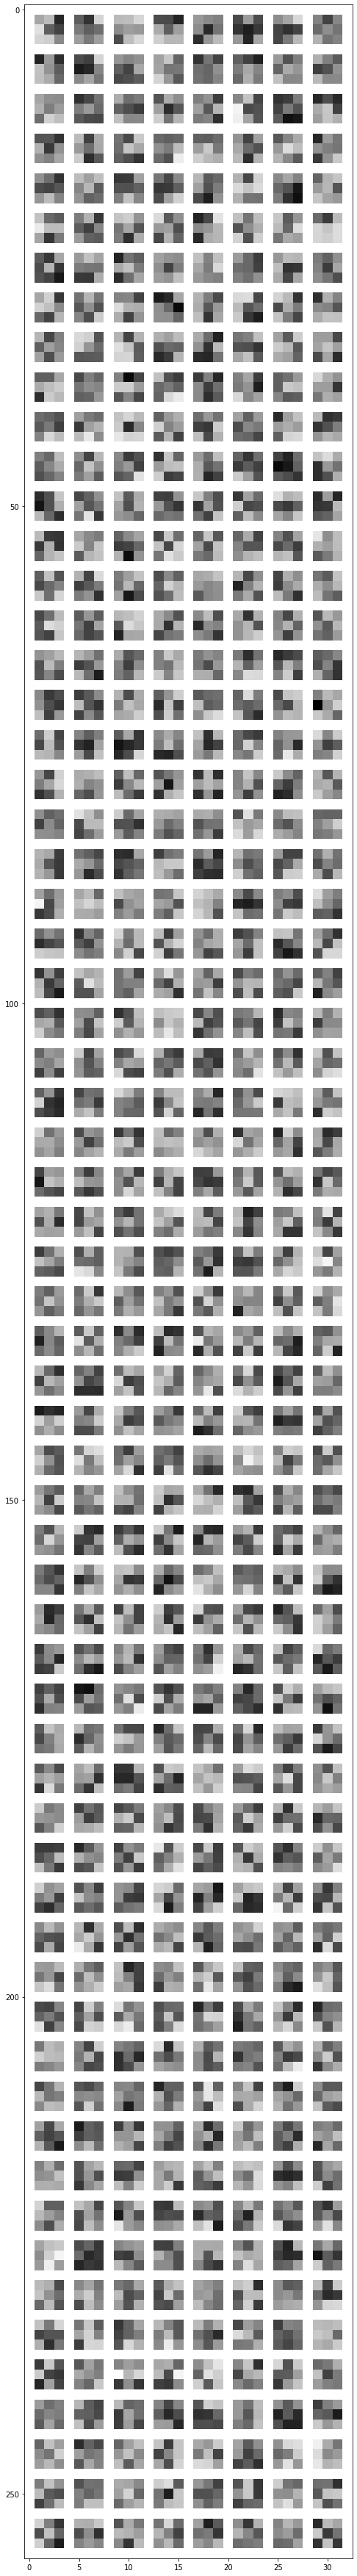

Visualization filters learned for layer: layer5


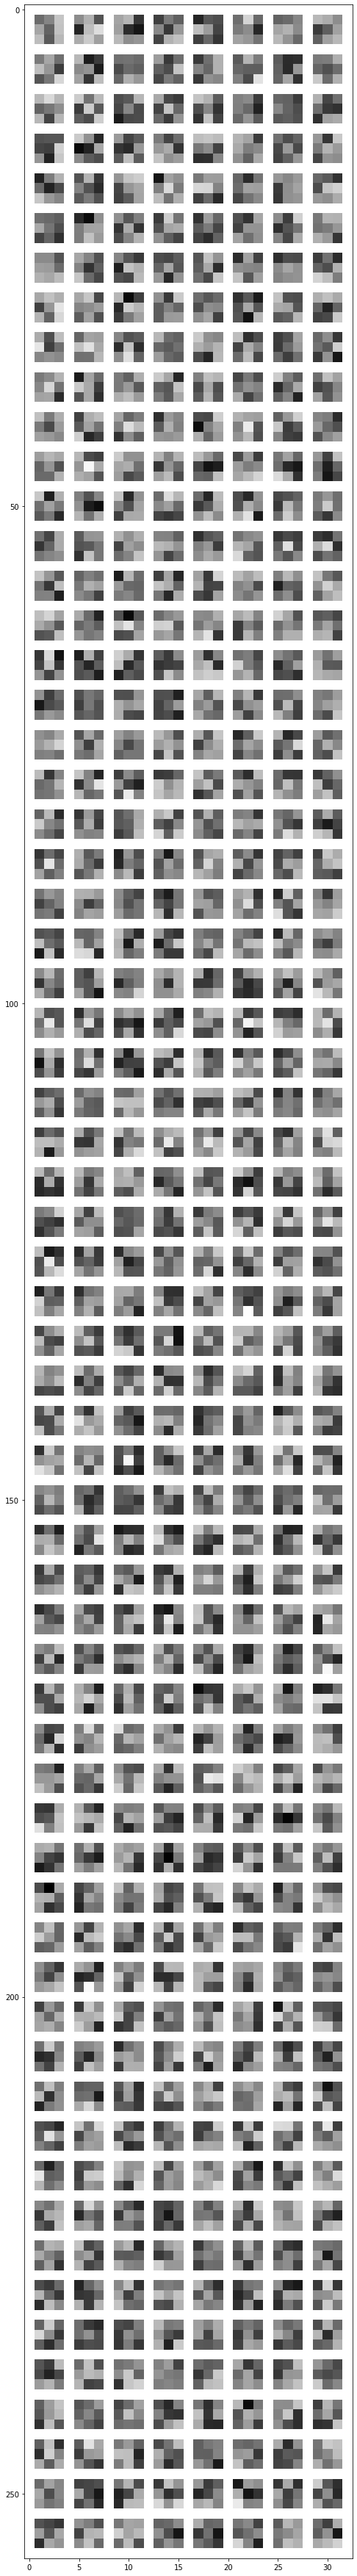

In [0]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
# conv1_filters_no_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]  
conv1_filters_no_binary = np.arange(64)
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_no_binary = model_no_binary.layer3
conv3_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_no_binary = model_no_binary.layer4
conv4_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

lr=0.0001
num_iter=1000
MNIST = False

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:325: UserWarning: Attempting to set identical left == right == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin, xmax, ymin, ymax])
/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:325: UserWarning: Attempting to set identical bottom == top == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin, xmax, ymin, ymax])


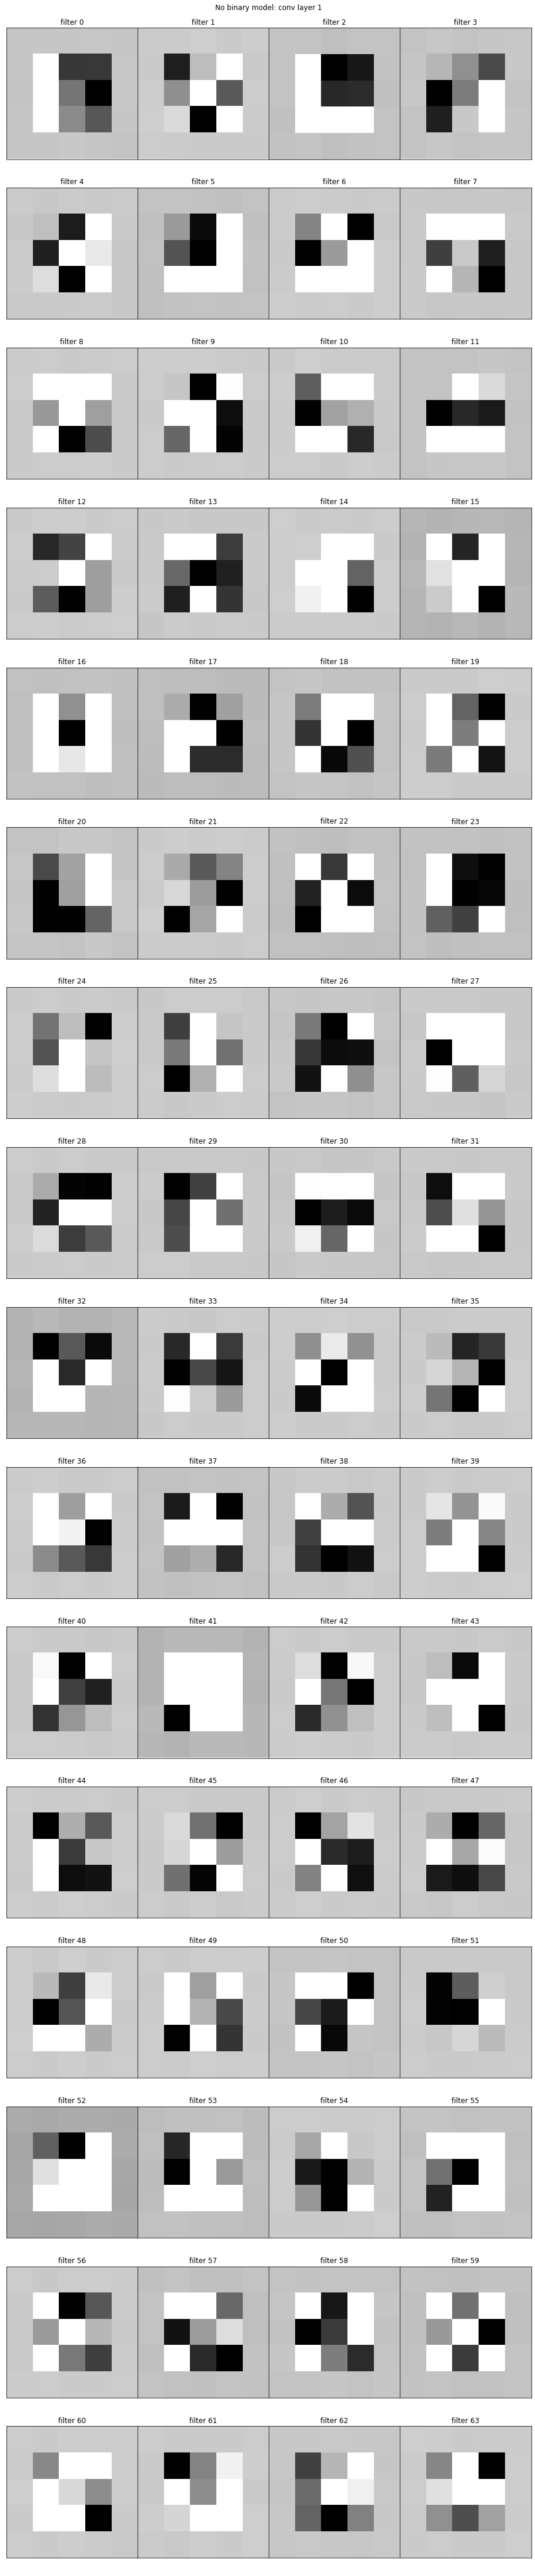

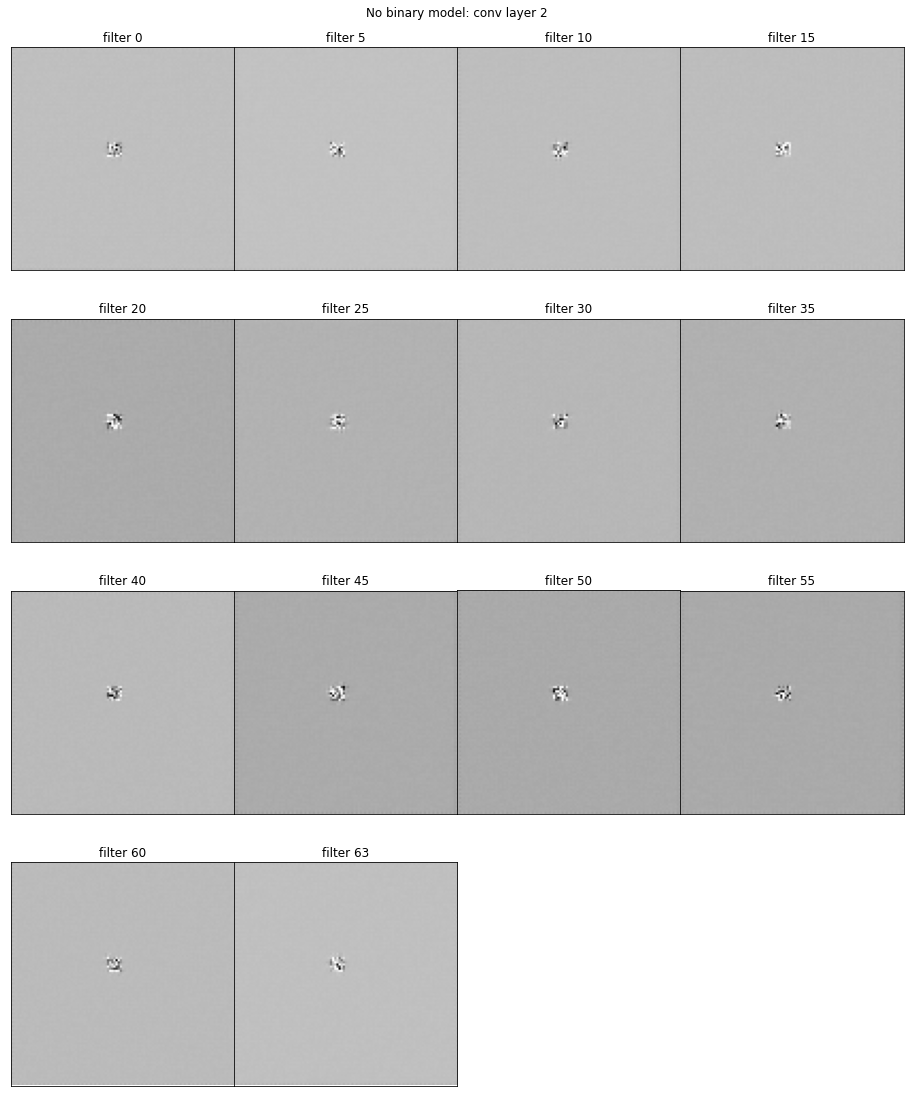

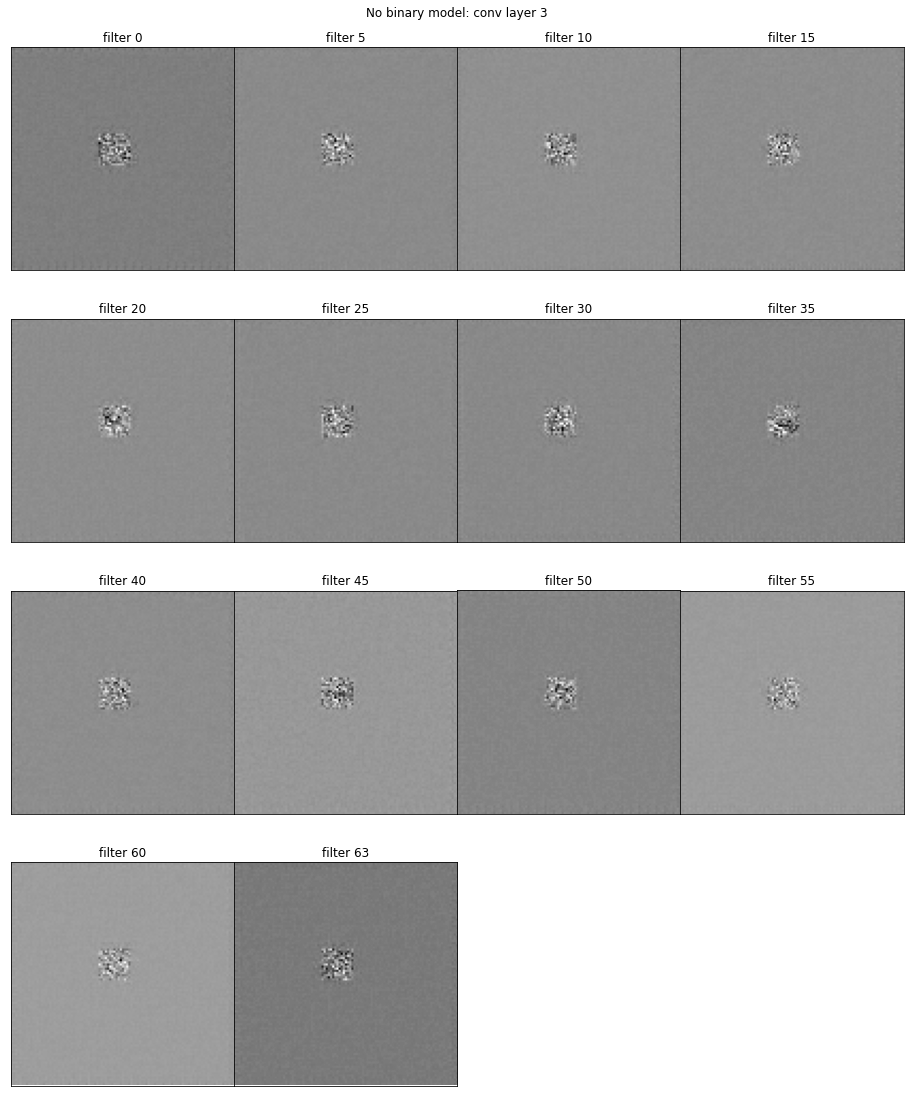

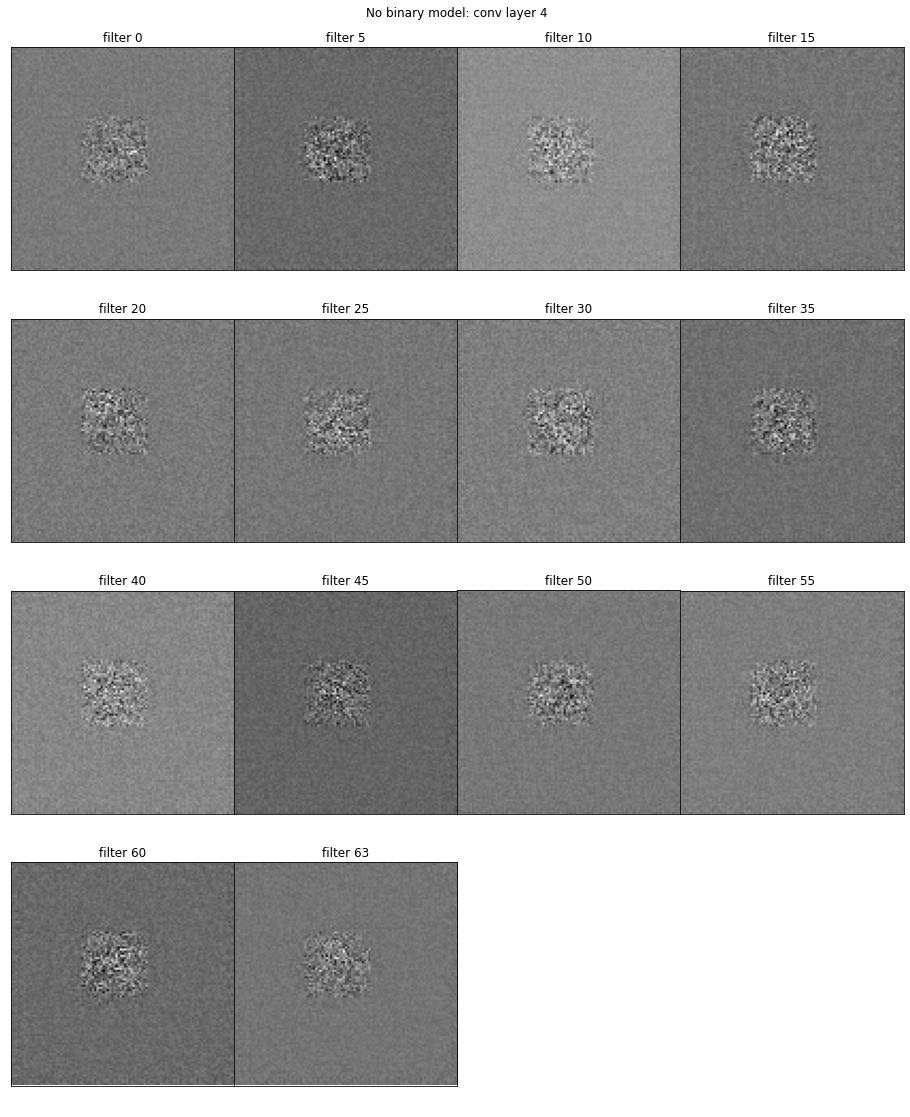

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1', first_conv_layer=True)
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')
g_ascent_no_binary.visualize(conv3_no_binary, MNIST, conv3_filters_no_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, lr=lr, num_iter=num_iter, title='No binary model: conv layer 3')
g_ascent_no_binary.visualize(conv4_no_binary, MNIST, conv4_filters_no_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, lr=lr, num_iter=num_iter, title='No binary model: conv layer 4')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
# conv1_filters_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
conv1_filters_binary = np.arange(64)
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_binary = model_binary.layer2
conv2_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_binary = model_binary.layer3
conv3_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_binary = model_binary.layer4
conv4_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

lr=0.0001
num_iter=1000
MNIST = False

In [0]:
g_ascent_binary.visualize(conv1_binary, MNIST, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='Binary model: conv layer 1', first_conv_layer=True)
g_ascent_binary.visualize(conv2_binary, MNIST, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='Binary model: conv layer 2')
g_ascent_binary.visualize(conv3_binary, MNIST, conv3_filters_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, lr=lr, num_iter=num_iter, title='Binary model: conv layer 3')
g_ascent_binary.visualize(conv4_binary, MNIST, conv4_filters_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, lr=lr, num_iter=num_iter, title='Binary model: conv layer 4')

Output hidden; open in https://colab.research.google.com to view.

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Modules:

In [0]:
def get_all_regions_max(loader, activations, len_img_h, len_img_w):

    dataiter = iter(loader)
    images, _ = dataiter.next()
    print('nb images: {}'.format(len(images)))

    print('begin extraction regions')
    region_final = {}
    activation_final = {}
    
    filter_layer2 = get_filter_layer2()
    filter_layer3 = get_filter_layer3()
    filter_layer4 = get_filter_layer4()

    for name, fm in activations.items():
      # for each image of fm 
      if name=='layer1':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 3, 3))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer2':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer3':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 15, 15))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer4':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 31, 31))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      for j in range(fm.shape[0]):
          print('treating image n {}/{}, for layer: {}'.format(j, fm.shape[0], name))
          
          im = images[j].unsqueeze(0).numpy().squeeze()  # image i of batch batch: numpy array: (28,28)
          if name=='layer1':
            regions_im_j = np.zeros((fm.shape[1], 3, 3))  # initialise empty list of regions for batch batch
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer2':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            regions_im_j = (regions_im_j*filter_layer2)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer3':
            regions_im_j = np.zeros((fm.shape[1], 15, 15))
            regions_im_j = (regions_im_j*filter_layer3)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer4':
            regions_im_j = np.zeros((fm.shape[1], 31, 31))
            regions_im_j = (regions_im_j*filter_layer4)/4
            activation_im_j = np.zeros((fm.shape[1]))
          for i in range(fm.shape[1]):  # for all fm in image j
            act_max = max(fm[j][i].min(), fm[j][i].max(), key=abs)  # get max activation value in fm j
            ind_x = int((np.where(fm[j][i]==act_max)[0])[0])  # get index (x,y) of act_max
            ind_y = int((np.where(fm[j][i]==act_max)[1])[0])

            if name=='layer1':
              region = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer2':
              region = get_region_layer2(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer3':
              region = get_region_layer3(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer4':
              region = get_region_layer4(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            
            regions_im_j[i] = region
            activation_im_j[i] = act_max.detach().numpy()
          regions_layer[j] = regions_im_j
          activation_layer[j] = activation_im_j
      region_final[name] = regions_layer
      activation_final[name] = activation_layer

    return region_final, activation_final

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([1000, 64, 53, 53])
layer2 torch.Size([1000, 128, 27, 27])
layer3 torch.Size([1000, 256, 14, 14])
layer4 torch.Size([1000, 512, 7, 7])
layer5 torch.Size([1000, 512, 4, 4])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_no_binary, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
region_layer3_no_binary = region_final['layer3']
region_layer4_no_binary = region_final['layer4']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer3_no_binary = activation_final['layer3']
activation_layer4_no_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

nb images: 1000
begin extraction regions
treating image n 0/1000, for layer: layer1


ValueError: ignored

In [0]:
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [0]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_binary, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
region_layer3_binary = region_final['layer3']
region_layer4_binary = region_final['layer4']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer3_binary = activation_final['layer3']
activation_layer4_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

In [0]:
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

#### Viz:

##### No binary model layer1:

In [0]:
# parameters
list_filter_interest_layer1 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage=percentage, list_filter=list_filter_interest_layer1)

##### No binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

##### No binary model layer3:

In [0]:
# parameters
list_filter_interest_layer3 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer3_no_binary
activations = activation_layer3_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer3)

##### No binary model layer4:

In [0]:
# parameters
list_filter_interest_layer4 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True

viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer4_no_binary
activations = activation_layer4_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer4)

##### Binary model layer1:

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

##### Binary model layer3:

In [0]:
# parameters
list_filter_interest_layer3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer3_binary
activations = activation_layer3_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer3)

##### Binary model layer4:

In [0]:
# parameters
list_filter_interest_layer4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer4_binary
activations = activation_layer4_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer4)

## Viz all:

### No binary model:

In [0]:
viz_filters(model_no_binary)

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1')

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

### Binary model:

In [ ]:
viz_filters(model_binary)

In [ ]:
g_ascent_binary = GradientAscent(model_binary, img_size=28)
g_ascent_binary.use_gpu = True

conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')

In [ ]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

# Draft

## Test activation maximization with pre trained model:

In [ ]:
!pip install flashtorch

In [ ]:
import torchvision.models as models
from flashtorch.activmax import GradientAscent

In [ ]:
model = models.vgg16(pretrained=True)

In [ ]:
conv1_2 = model.features[2]
conv1_2_filters = [17, 33, 34, 57]

conv2_1 = model.features[5]
conv2_1_filters = [27, 40, 68, 73]

conv3_1 = model.features[10]
conv3_1_filters = [31, 61, 147, 182]

conv4_1 = model.features[17]
conv4_1_filters = [238, 251, 338, 495]

conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 409]

In [ ]:
g_ascent = GradientAscent(model.features)

In [ ]:
g_ascent.visualize(conv1_2, conv1_2_filters, title='conv1_2');
g_ascent.visualize(conv2_1, conv2_1_filters, title='conv2_1');
g_ascent.visualize(conv3_1, conv3_1_filters, title='conv3_1');
g_ascent.visualize(conv4_1, conv4_1_filters, title='conv4_1');
g_ascent.visualize(conv5_1, conv5_1_filters, title='conv5_1');

## TEst activation region max:

In [ ]:
from utils.functions import Hardsigmoid
from visualize.viz import get_region_layer1
import matplotlib

In [ ]:
def test_act_region_max(index_data, images):

  image = images[index_data].unsqueeze(0)
  label = labels[index_data].item()

  output = model_no_binary(image)

  act_conv = activation[keys]
  print('{} for label {}'.format(keys, label))
  print(act_conv.shape)

  i=0
  act_max_abs = max(act_conv[0][i].min(), act_conv[0][i].max(), key=abs)
  act_max = act_conv[0][i].max()
  print(act_max_abs, act_max)
  ind_x = int((np.where(act_conv[0][i] == act_max)[0])[0])  # get index (x,y) of act_max
  ind_y = int((np.where(act_conv[0][i] == act_max)[1])[0])
  print(ind_x, ind_y)

  im = image.squeeze()
  name='no binary'
  stride=2
  padding=1
  filter_size=3
  len_img_h = 105
  len_img_w = 105
  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)

  act_conv_im = activation[keys].squeeze()
  plt.imshow(act_conv_im[index_data], cmap='gray')
  plt.scatter(ind_y,ind_x,color='r')
  plt.show()

  fig,ax = plt.subplots(1)
  ax.imshow(im, cmap='gray')
  ax.scatter(((ind_y*stride)-padding)+1, ((ind_x*stride)-padding)+1,color='r')
  rect=matplotlib.patches.Rectangle((begin_raw-1, begin_col-1),3,3, edgecolor='r', facecolor="none")
  ax.add_patch(rect)
  plt.show()

  s_y = ((ind_y*stride)-padding)
  e_y = ((ind_y*stride)-padding)+3
  s_x = ((ind_x*stride)-padding)
  e_x=((ind_x*stride)-padding)+3

  print(im[s_y:e_y,s_x:e_x])
  print(region)
  plt.imshow(region, cmap='gray')
  plt.show()

  return region, begin_col, end_col, begin_raw, end_raw


In [ ]:
activation = {}

for name, m in model_no_binary.named_modules():
        if type(m) == Hardsigmoid or type(m) == nn.ReLU:
            m.register_forward_hook(get_activation(name, activation))

index_data=10
if index_data == None:
    index_data = random.randint(0, len(train_loader))

dataiter = iter(train_loader)
images, labels = dataiter.next()

model_no_binary.cpu()
output = model_no_binary(image)

In [ ]:
index_data=0

region, begin_col, end_col, begin_raw, end_raw = test_act_region_max(index_data, images)

print(region.shape)
print(region)
print(begin_col,end_col,begin_raw,end_raw)

In [0]:
viz_filters(model_binary)

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=28)
g_ascent_binary.use_gpu = True

conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

# Draft

## Test activation maximization with pre trained model:

In [0]:
!pip install flashtorch

In [0]:
import torchvision.models as models
from flashtorch.activmax import GradientAscent

In [0]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [0]:
conv1_2 = model.features[2]
conv1_2_filters = [17, 33, 34, 57]

conv2_1 = model.features[5]
conv2_1_filters = [27, 40, 68, 73]

conv3_1 = model.features[10]
conv3_1_filters = [31, 61, 147, 182]

conv4_1 = model.features[17]
conv4_1_filters = [238, 251, 338, 495]

conv5_1 = model.features[24]
conv5_1_filters = [45, 271, 363, 409]

In [0]:
g_ascent = GradientAscent(model.features)

In [0]:
g_ascent.visualize(conv1_2, conv1_2_filters, title='conv1_2');
g_ascent.visualize(conv2_1, conv2_1_filters, title='conv2_1');
g_ascent.visualize(conv3_1, conv3_1_filters, title='conv3_1');
g_ascent.visualize(conv4_1, conv4_1_filters, title='conv4_1');
g_ascent.visualize(conv5_1, conv5_1_filters, title='conv5_1');

Output hidden; open in https://colab.research.google.com to view.

## TEst activation region max:

In [0]:
from utils.functions import Hardsigmoid
from visualize.viz import get_region_layer1
import matplotlib

In [0]:
def test_act_region_max(index_data, images):

  image = images[index_data].unsqueeze(0)
  label = labels[index_data].item()

  output = model_no_binary(image)

  act_conv = activation[keys]
  print('{} for label {}'.format(keys, label))
  print(act_conv.shape)

  i=0
  act_max_abs = max(act_conv[0][i].min(), act_conv[0][i].max(), key=abs)
  act_max = act_conv[0][i].max()
  print(act_max_abs, act_max)
  ind_x = int((np.where(act_conv[0][i] == act_max)[0])[0])  # get index (x,y) of act_max
  ind_y = int((np.where(act_conv[0][i] == act_max)[1])[0])
  print(ind_x, ind_y)

  im = image.squeeze()
  name='no binary'
  stride=2
  padding=1
  filter_size=3
  len_img_h = 105
  len_img_w = 105
  region, begin_col, end_col, begin_raw, end_raw = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)

  act_conv_im = activation[keys].squeeze()
  plt.imshow(act_conv_im[index_data], cmap='gray')
  plt.scatter(ind_y,ind_x,color='r')
  plt.show()

  fig,ax = plt.subplots(1)
  ax.imshow(im, cmap='gray')
  ax.scatter(((ind_y*stride)-padding)+1, ((ind_x*stride)-padding)+1,color='r')
  rect=matplotlib.patches.Rectangle((begin_raw-1, begin_col-1),3,3, edgecolor='r', facecolor="none")
  ax.add_patch(rect)
  plt.show()

  s_y = ((ind_y*stride)-padding)
  e_y = ((ind_y*stride)-padding)+3
  s_x = ((ind_x*stride)-padding)
  e_x=((ind_x*stride)-padding)+3

  print(im[s_y:e_y,s_x:e_x])
  print(region)
  plt.imshow(region, cmap='gray')
  plt.show()

  return region, begin_col, end_col, begin_raw, end_raw


In [0]:
activation = {}

for name, m in model_no_binary.named_modules():
        if type(m) == Hardsigmoid or type(m) == nn.ReLU:
            m.register_forward_hook(get_activation(name, activation))

index_data=10
if index_data == None:
    index_data = random.randint(0, len(train_loader))

dataiter = iter(train_loader)
images, labels = dataiter.next()

model_no_binary.cpu()
output = model_no_binary(image)

act_layer1 for label 423
torch.Size([1, 64, 53, 53])
tensor(4.9301) tensor(4.9301)
23 15


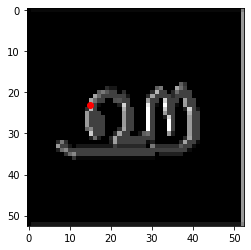

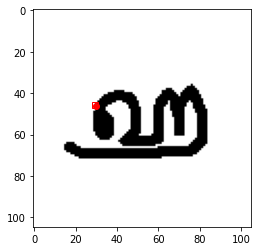

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


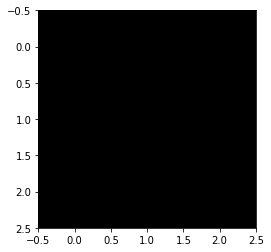

torch.Size([3, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
45 48 29 32


In [0]:
index_data=0

region, begin_col, end_col, begin_raw, end_raw = test_act_region_max(index_data, images)

print(region.shape)
print(region)
print(begin_col,end_col,begin_raw,end_raw)